### Concepts we can try:
 * focal loss 
 * cross entropy loss (?)
 * resampling: over and undersampling.
 * SMOTE (similar to imputation)
 * different algorithms (decision trees tend to work well with imbalanced data: need to write an explaanation of why)
 * different cost function with UNEQUAL MISSLCLASSIFICATION COSTS. (is this similar to focal loss??)
 * RUSBoost (in Matlab, is there an analogue for python?)

### Focal Loss Benefits
 * faster training by skipping overrepresented data ?? (https://www.analyticsvidhya.com/blog/2020/08/a-beginners-guide-to-focal-loss-in-object-detection/)
 ### Cross Entropy Loss
 penaliz wrong predictions more than right predictions
 ### Unequal Costs
 In some applications costs of misclassification may differ. In our case of email fraud this is readily apparent: misclassifying an transation as fraud causes some transactional costs and inconvenience to the consumer, but misclassifying a fraudulent transaction as real can cost the consumer or the credit card company thousands of dollars. For this reason, it seems prurient to consider a case where the amount is a function of our missclassification cost.
 
 $ E[classify as fraud | not fraud ] < $$ E[classify as real | fraud] $
 
 
 ### evaluation metrics
 F1 score and others commonly mentioned.
 total loss to company may be interesting to look at.

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

In [3]:
df = pd.read_csv("creditcard.csv")
#Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have
#not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between
#each transaction and the first transaction in the dataset.

In [7]:
df.rename(columns = {'Class':'isFraud'}, inplace = True) 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isFraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df['isFraud'].value_counts()

0    284315
1       492
Name: isFraud, dtype: int64

(array([1.91663e+05, 3.71880e+04, 1.71910e+04, 1.02010e+04, 6.12600e+03,
        4.49300e+03, 3.00300e+03, 2.36600e+03, 1.66000e+03, 1.64200e+03,
        1.09200e+03, 1.00200e+03, 7.46000e+02, 6.45000e+02, 5.40000e+02,
        4.78000e+02, 4.48000e+02, 3.51000e+02, 2.87000e+02, 3.97000e+02,
        2.13000e+02, 2.04000e+02, 1.92000e+02, 2.06000e+02, 1.49000e+02,
        1.32000e+02, 1.29000e+02, 1.10000e+02, 9.60000e+01, 1.01000e+02,
        7.30000e+01, 8.50000e+01, 7.60000e+01, 7.30000e+01, 5.70000e+01,
        5.90000e+01, 6.00000e+01, 5.30000e+01, 5.60000e+01, 3.40000e+01,
        2.90000e+01, 2.60000e+01, 2.00000e+01, 2.80000e+01, 2.00000e+01,
        1.90000e+01, 2.10000e+01, 1.40000e+01, 2.40000e+01, 2.50000e+01,
        1.80000e+01, 1.70000e+01, 2.50000e+01, 1.40000e+01, 1.10000e+01,
        9.00000e+00, 1.50000e+01, 1.00000e+01, 1.40000e+01, 1.10000e+01,
        1.20000e+01, 1.10000e+01, 1.00000e+01, 4.00000e+00, 8.00000e+00,
        1.10000e+01, 8.00000e+00, 8.00000e+00, 1.10

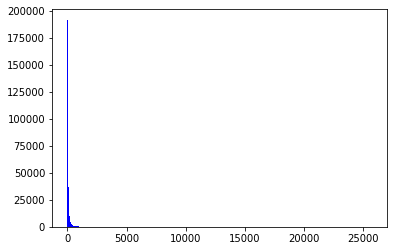

In [45]:
import matplotlib.pyplot as plt
plt.hist(df[df.isFraud == False]['Amount'], color='b', label='Real', bins=100)

(array([230.,  27.,  14.,   5.,  12.,   8.,   9.,   4.,   5.,   2.,   3.,
          6.,   3.,   5.,  38.,   7.,   3.,   5.,   3.,   1.,   3.,   1.,
          1.,   0.,   4.,   2.,   5.,   1.,   1.,   2.,   0.,   1.,   1.,
          4.,   2.,   3.,   2.,   0.,   3.,   0.,   1.,   2.,   0.,   2.,
          4.,   5.,   0.,   1.,   2.,   1.,   3.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.,   3.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

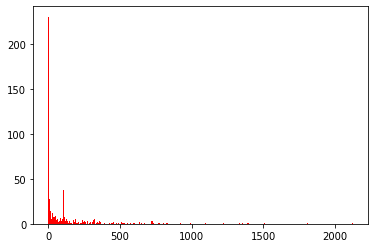

In [44]:
plt.hist(df[df.isFraud == True]['Amount'], color='r', label='Fraud', bins=300)

In [ ]:
def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu) / sigma

In [ ]:
from sklearn.model_selection  import train_test_split
X, y = dataset.iloc[:,:-2], dataset.iloc[:, -2]
y = keras.utils.to_categorical(y, num_classes=2)
X = feature_normalize(X.as_matrix())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from tensorflow.keras.models import Sequential
import tensorflow as tf

model = Sequential()

from tensorflow.keras.layers import Dense

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

model.add(Dense(10, input_dim=input_dim, activation='relu', name='input'))
model.add(Dense(20, activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(nb_classes, activation='softmax', name='output'))

In [6]:
# focal loss method


NameError: name 'cols' is not defined

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284315, dtype: float64